# 1. Data Preprocessing

In [12]:
import importlib
import func
importlib.reload(func)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [21]:
df_101191 = pd.read_excel("data/191_BWSC101 Release Log Form.xlsx")
df_101592 = pd.read_excel("data/592_BWSC101 Release Log Form.xlsx")
df_101607 = pd.read_excel("data/607_BWSC101 Release Log Form.xlsx")

In [3]:
print(df_101191.shape)
print(df_101592.shape)
print(df_101607.shape)

(10943, 215)
(1535, 223)
(7125, 250)


## 1.1 Process BWSC107

df_107124 = pd.read_excel("data/124_BWSC107 Tier Classification Transmittal Form.xlsx")
df_107621 = pd.read_excel("data/621_BWSC107 Tier Classification Transmittal Form.xlsx")

df_107124["RTN"] = df_107124.apply(completeRTN, axis=1)
df_107621["RTN"] = df_107621.apply(completeRTN, axis=1)

df_107621revised = df_107621.loc[:, ['B1', 'B1A', 'B1B', 'B7', 'B7A', 'B7B', 'RTN']]
df_107621revised = df_107621revised[(df_107621revised['B1'] == 'Y') | (df_107621revised['B7'] == 'Y')]

df_107621revised['new'] = (df_107621revised['B1'] == 'Y').astype(object)
df_107621revised['newtc'] = (df_107621revised['B1A'] == 'Y').astype(object)
df_107621revised['revised'] = (df_107621revised['B7'] == 'Y').astype(object)
df_107621revised['revisedtc'] = (df_107621revised['B7A'] == 'Y').astype(object)

df_107621revised = df_107621revised.loc[:, ['RTN', 'new', 'newtc', 'revised', 'revisedtc']]

df_107621revised.shape

df_107124revised = df_107124.loc[:, ['B1', 'B2', 'B1B', 'B8', 'B8A', 'B8B', 'B8C', 'B8D', 'RTN']]
df_107124revised = df_107124revised[(df_107124revised['B1'] == 'Y') 
                                    | (df_107124revised['B2'] == 'Y') 
                                    | (df_107124revised['B8'] == 'Y')]
df_107124revised['new'] = ((df_107124revised['B1'] == 'Y') | (df_107124revised['B2'] == 'Y')).astype(object)
df_107124revised['newtc'] = (df_107124revised['B1'] == 'Y').astype(object)
df_107124revised['revised'] = (df_107124revised['B8'] == 'Y').astype(object)
df_107124revised['revisedtc'] = (df_107124revised['B8D'] != 'Y').astype(object)

df_107124revised = df_107124revised.loc[:, ['RTN', 'new', 'newtc', 'revised', 'revisedtc']]

df_107124revised.shape

print(df_107124.shape)
print(df_107124revised.shape)
print(df_107621.shape)
print(df_107621revised.shape)

df_107 = df_107124revised.append(df_107621revised)

df_107.shape

df_107.head()

df_tier = func.processtiers(df_107)

df_tier.shape

df_tier[df_tier["Tier"] == 1].shape

df_tier[df_tier["Tier"] == 2].shape

## 1.2 Process BWSC101

In [22]:
df_101191["RTN"] = df_101191.apply(func.completeRTN, axis=1)
df_101592["RTN"] = df_101592.apply(func.completeRTN, axis=1)
df_101607["RTN"] = df_101607.apply(func.completeRTN, axis=1)

In [23]:
func.preprocess(df_101607, "101607proc.xlsx", "101607")
print(df_101607.shape)
func.preprocess(df_101592, "101592proc.xlsx", "101592")
print(df_101592.shape)
func.preprocess(df_101191, "101191proc.xlsx", "101191")
print(df_101191.shape)

(7125, 144)
(1535, 144)
(10943, 144)


In [24]:
df_101 = df_101191.append(df_101592)
df_101 = df_101.append(df_101607)

In [25]:
df_101.shape

(19603, 144)

In [26]:
len(df_101['RTN'].unique())

18958

In [27]:
func.prepmissing(df_101191) # it is not processing
func.prepmissing(df_101592) # it is not processing
func.prepmissing(df_101607) # it is not processing

In [28]:
df_101.

,A1,A2,A2A,A2B,A3,A3A,A3B,A3C,A3D,B6,...,H5,H6,H7,H8,H9,LUST_ELIGIBLE_NO,LUST_ELIGIBLE_UNKNOWN,LUST_ELIGIBLE_YES,RTN,STAFF_UNASSIGNED
0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,2-0016262,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2-0016234,0
2,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,2-0016265,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,2-0016260,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2-0016240,0


## 1.3 Combine BWSC101 and BWSC107

df_tiers = df_101.join(df_tier.set_index("RTN"), how='inner', on="RTN", rsuffix='_')

df_tiers.shape

len(df_tiers['RTN'].unique())

df_tiers.drop('RTN', axis=1, inplace=True)

df_tiers.head()

df_tiers["Tier"] = df_tiers["Tier"].astype(int)

## 1.4 Process Tier 1D

In [13]:
df_tclass = pd.read_excel('data/TClass Phase Action Dates All RTNs 2-12-2018.xlsx', sheetname="All")

In [42]:
df_tclass.shape

(52847, 31)

In [14]:
df_tclass["length"] = df_tclass.apply(func.daylength, axis=1)

(array([  4866.,  11937.,   1970.,   3861.,    933.,    914.,    989.,
           945.,   1344.,   1292.,  10412.,    560.,    410.,    368.,
           288.,    232.,    208.,    250.,    177.,    147.]),
 array([   0.,   35.,   70.,  105.,  140.,  175.,  210.,  245.,  280.,
         315.,  350.,  385.,  420.,  455.,  490.,  525.,  560.,  595.,
         630.,  665.,  700.]),
 <a list of 20 Patch objects>)

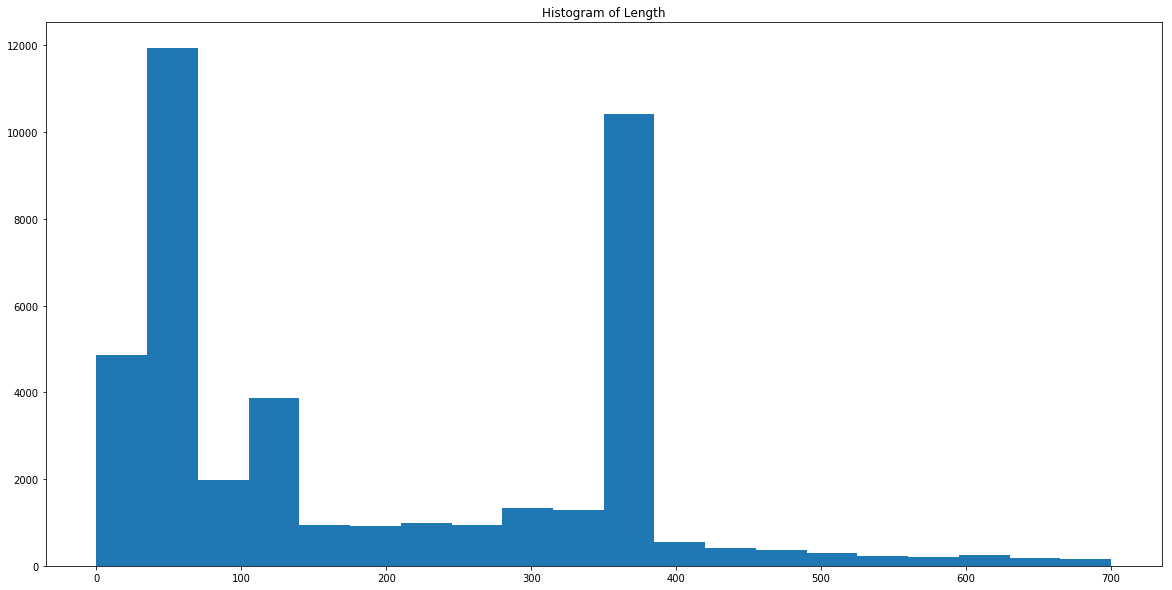

In [15]:
plt.figure(figsize=(20,10))
plt.title("Histogram of Length")
plt.hist(df_tclass["length"], bins=20, range=(0, 700))

(array([ 2074.,  4344.,   499.,  1121.,   214.,   221.,   258.,   214.,
          376.,   293.,  2572.,   106.,    70.,    65.,    47.,    38.,
           34.,    57.,    19.,    28.]),
 array([   0.,   35.,   70.,  105.,  140.,  175.,  210.,  245.,  280.,
         315.,  350.,  385.,  420.,  455.,  490.,  525.,  560.,  595.,
         630.,  665.,  700.]),
 <a list of 20 Patch objects>)

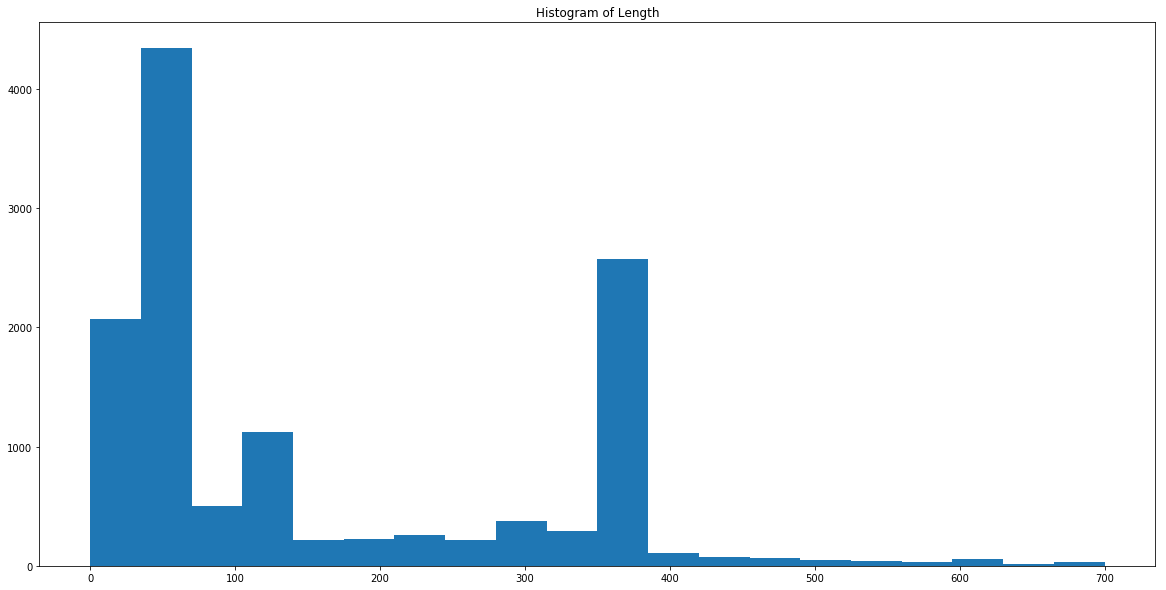

In [41]:
plt.figure(figsize=(20,10))
plt.title("Histogram of Length")
plt.hist(length, bins=20, range=(0, 700))

In [31]:
length = df_tclass.set_index("RTN")["length"]

In [33]:
length.index.isin

Index(['1-0000001', '1-0000003', '1-0000004', '1-0000005', '1-0000006',
       '1-0000007', '1-0000008', '1-0000009', '1-0000010', '1-0000011',
       ...
       '4-3025693', '4-3025699', '4-3025700', '4-3025719', '4-3025744',
       '4-3025746', '4-3025762', '4-3025803', '4-3025837', '4-3025844'],
      dtype='object', name='RTN', length=52847)

In [35]:
length = length[length.index.isin(df_101["RTN"])]

In [36]:
(length == 999).groupby((length == 999)).count()

length
False    13042
Name: length, dtype: int64

In [37]:
(length > 730).groupby((length > 730)).count()

length
False    12710
True       332
Name: length, dtype: int64

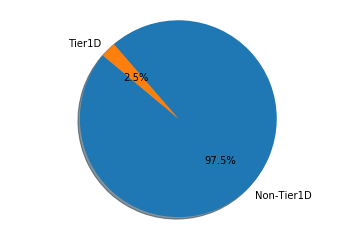

In [39]:
plt.pie((length > 730).groupby((length > 730)).count(), labels=["Non-Tier1D", "Tier1D"], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

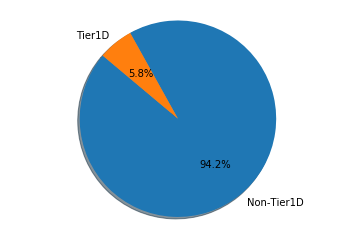

In [40]:
plt.pie((length > 400).groupby((length > 400)).count(), labels=["Non-Tier1D", "Tier1D"], autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [15]:
df_tclass["Tier1D"] = df_tclass.apply(func.isTier1D, axis=1)

In [16]:
df_tclass['RTN'].groupby(df_tclass["Tier1D"]).count()

Tier1D
False    38019
True     14828
Name: RTN, dtype: int64

In [17]:
df_tclass_tier1D = df_tclass.loc[:,['RTN',"Notification","Phase1Cs","End Date","Tier1D"]]
df_tclass_tier1D.head()

,RTN,Notification,Phase1Cs,End Date,Tier1D
0,1-0000001,2002-02-02,NaT,1995-10-11,False
1,1-0000003,1987-01-15,NaT,1996-08-08,True
2,1-0000004,1986-11-17,NaT,1986-12-31,False
3,1-0000005,1987-01-15,NaT,1993-07-23,True
4,1-0000006,1987-04-15,1998-07-31,2005-09-27,True


In [18]:
df_101_tier = df_101.set_index("RTN").join(df_tclass_tier1D.set_index("RTN"), how="inner")

In [20]:
df_101_tier = df_101_tier.drop(["Notification","Phase1Cs","End Date"], axis = 1 )

indices107 = df_107124['RTN'].tolist()
indices107.append(df_107621['RTN'].tolist())

len(indices101)

df_tclassrao = df_tclass[(df_tclass['Status'] == 'RAO') & (df_tclass['Phase1Cs'].isnull())]

indicesrao = df_tclassrao.join(df_101[['RTN']].set_index('RTN'), how='inner', on="RTN", rsuffix='_')['RTN'].tolist()

len(indicesrao)

len(set(indicesrao))

print(set(indicesrao) & set(df_101.join(df_tier.set_index("RTN"), how='inner', on="RTN", rsuffix='_')['RTN'].tolist()))
print(len(set(indicesrao)))
print(len(set(df_101.join(df_tier.set_index("RTN"), how='inner', on="RTN", rsuffix='_')['RTN'].tolist())))

df_rao = df_101[df_101['RTN'].isin(indicesrao)]

df_rao.head()

df_rao['Tier'] = 3

df_class = df_tiers.append(df_rao.drop('RTN', axis=1))

df_class.shape

(df_class['Tier'].groupby(df_class['Tier']).count() / len(df_class[['Tier']])).tolist()

labels = ['Tier I', 'Tier II', 'Others']
sizes = (df_class['Tier'].groupby(df_class['Tier']).count() / len(df_class[['Tier']])).tolist()
colors = ['yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

df_class.shape

In [319]:
X = df_101_tier.iloc[:, :-1]
y = df_101_tier.iloc[:, -1]

## Feature Selection

In [318]:
from sklearn.ensemble import RandomForestClassifier

In [328]:
# Use random forest to extract useful features
# Use all the data
rfmodel = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rfmodel.fit(X, y)
feat_import = pd.DataFrame({"Feature": X.columns, "Importance": rfmodel.feature_importances_})\
        .sort_values("Importance", ascending=False)[:30]

In [329]:
features = feat_import['Feature'].tolist()

## Modeling

In [357]:
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X.loc[:, features], 
                                                    y, 
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=46)

In [343]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_sample(X_train, y_train)
print(X_train.shape)
print(Counter(y_train).items())
print(X_train.shape)
print("Training size: %r" %X_train.shape[0])
print("Test size: %r" %X_test.shape[0])

(18136, 30)
dict_items([(True, 9068), (False, 9068)])
(18136, 30)
Training size: 18136
Test size: 3331


### Random Forest

In [344]:
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [345]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [346]:
t_predicted = rf.predict(X_train)
print(classification_report(y_train, t_predicted, target_names=['Tier 1D','other']))

             precision    recall  f1-score   support

    Tier 1D       0.95      0.95      0.95      9068
      other       0.95      0.95      0.95      9068

avg / total       0.95      0.95      0.95     18136



In [347]:
y_predict = rf.predict(X_test)

Confusion matrix, without normalization
[[  79  229]
 [ 212 2811]]
             precision    recall  f1-score   support

    Tier 1D       0.92      0.93      0.93      3023
      other       0.27      0.26      0.26       308

avg / total       0.86      0.87      0.87      3331



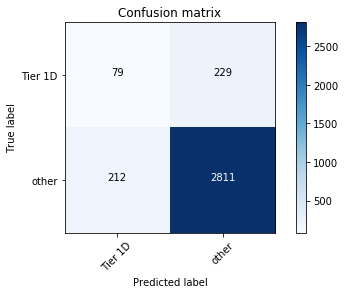

In [348]:
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, target_names=['Tier 1D','other']))

### Adaboost

In [349]:
ab = AdaBoostClassifier()

In [350]:
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [351]:
y_predict = ab.predict(X_test)

Confusion matrix, without normalization
[[ 141  167]
 [ 594 2429]]
             precision    recall  f1-score   support

    Tier 1D       0.94      0.80      0.86      3023
      other       0.19      0.46      0.27       308

avg / total       0.87      0.77      0.81      3331



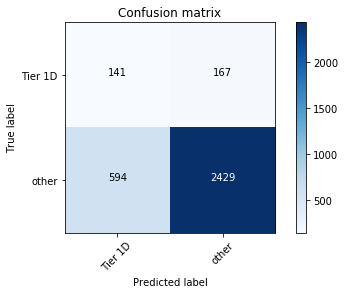

In [352]:
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, target_names=['Tier 1D','other']))

### SVM

Confusion matrix, without normalization
[[ 259   49]
 [1621 1402]]
             precision    recall  f1-score   support

    Tier 1D       0.97      0.46      0.63      3023
      other       0.14      0.84      0.24       308

avg / total       0.89      0.50      0.59      3331



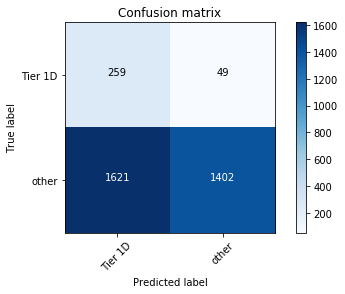

In [356]:
svc = LinearSVC()
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 168  140]
 [ 671 2352]]
             precision    recall  f1-score   support

    Tier 1D       0.94      0.78      0.85      3023
      other       0.20      0.55      0.29       308

avg / total       0.88      0.76      0.80      3331



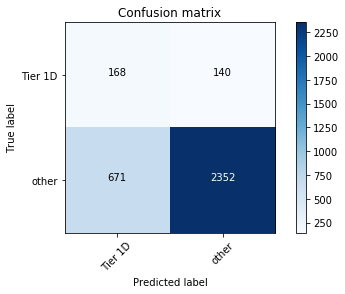

In [358]:
svm = svm.NuSVC()
svm.fit(X_train, y_train)
y_predict = svm.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, target_names=['Tier 1D','other']))

Confusion matrix, without normalization
[[ 213   95]
 [ 908 2115]]
             precision    recall  f1-score   support

    Tier 1D       0.96      0.70      0.81      3023
      other       0.19      0.69      0.30       308

avg / total       0.89      0.70      0.76      3331



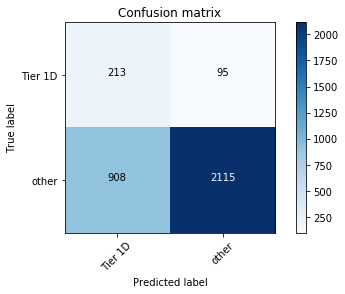

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, target_names=['Tier 1D','other']))

In [ ]:
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
y_predict = svc.predict(X_test)
func.plot_confusion_matrix(confusion_matrix(y_test, y_predict, labels=[True, False]), classes=['Tier 1D','other'])
print(classification_report(y_test, y_predict, target_names=['Tier 1D','other']))

### deep learning

In [245]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
importlib.reload(func)
%matplotlib inline

In [275]:
torch.Tensor(X_test.astype(float).as_matrix())


     1.0000      1.0000      1.0000  ...       1.0000      0.0000      0.0000
     0.0000      1.0000      1.0000  ...       0.0000      0.0000      0.0000
     1.0000      1.0000      1.0000  ...       0.0000      0.0000      0.0000
                ...                   ⋱                   ...                
     1.0000      1.0000      1.0000  ...       1.0000      0.0000      1.0000
     1.0000      1.0000      1.0000  ...       1.0000      0.0000      0.0000
     0.0000      1.0000      1.0000  ...       0.0000      0.0000      0.0000
[torch.FloatTensor of size 3997x143]

In [296]:
train = torch.utils.data.TensorDataset(torch.Tensor(X_train).unsqueeze(1), 
                                       torch.LongTensor(y_train.astype(int)))
train_loader = torch.utils.data.DataLoader(train, batch_size=4, shuffle=True)

test = torch.utils.data.TensorDataset(torch.Tensor(X_test.astype(float).as_matrix()).unsqueeze(1), 
                                       torch.LongTensor(y_test.astype(int).as_matrix()))
test_loader = torch.utils.data.DataLoader(test, batch_size=4, shuffle=False)

In [297]:
net = func.Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0008, momentum=0.9)

In [298]:
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.5f' %(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 0.69585
[1,  4000] loss: 0.69260
[2,  2000] loss: 0.69265
[2,  4000] loss: 0.69101
[3,  2000] loss: 0.68524
[3,  4000] loss: 0.66635
[4,  2000] loss: 0.62708
[4,  4000] loss: 0.60513
[5,  2000] loss: 0.58910
[5,  4000] loss: 0.58221
[6,  2000] loss: 0.57219
[6,  4000] loss: 0.57097
[7,  2000] loss: 0.56748
[7,  4000] loss: 0.54806
[8,  2000] loss: 0.53600
[8,  4000] loss: 0.50920
[9,  2000] loss: 0.50743
[9,  4000] loss: 0.49194
[10,  2000] loss: 0.47247
[10,  4000] loss: 0.48075
[11,  2000] loss: 0.46068
[11,  4000] loss: 0.45857
[12,  2000] loss: 0.45816
[12,  4000] loss: 0.44388
[13,  2000] loss: 0.44391
[13,  4000] loss: 0.43968
[14,  2000] loss: 0.43036
[14,  4000] loss: 0.42795
[15,  2000] loss: 0.41985
[15,  4000] loss: 0.42315
[16,  2000] loss: 0.41674
[16,  4000] loss: 0.41704
[17,  2000] loss: 0.41786
[17,  4000] loss: 0.40281
[18,  2000] loss: 0.40359
[18,  4000] loss: 0.40020
[19,  2000] loss: 0.39750
[19,  4000] loss: 0.40045
[20,  2000] loss: 0.39508
[20,

In [299]:
classes = ['Other', 'Tier 1D']
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
for data in test_loader:
    images, labels = data
    # print(labels)
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        try:
            label = labels[i]
            class_correct[label] += c[i]
            class_total[label] += 1
        except:
            pass

for i in range(2):
    print('Accuracy of %5s: %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Other: 92 %
Accuracy of Tier 1D: 21 %


In [286]:
classes = ['Other', 'Tier 1D']
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
for data in train_loader:
    images, labels = data
    # print(labels)
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1

for i in range(2):
    print('Accuracy of %5s: %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Other: 85 %
Accuracy of Tier 1D: 84 %
